<a href="https://colab.research.google.com/github/sagar-shende/Sagar-demo/blob/main/Netflix_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Netflix Dataset .csv', encoding='latin-1')

In [3]:
df.head()

,ï»¿Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ï»¿Show_Id    7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [5]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df['Year'] = df['Release_Date'].dt.year

In [6]:
df[['Release_Date', 'Year']].head(10)

,Release_Date,Year
0,2020-08-14,2020.0
1,2016-12-23,2016.0
2,2018-12-20,2018.0
3,2017-11-16,2017.0
4,2020-01-01,2020.0
5,2017-07-01,2017.0
6,2020-06-01,2020.0
7,2019-11-01,2019.0
8,2019-04-01,2019.0
9,2017-12-15,2017.0


In [7]:
df.isnull().sum()

,0
ï»¿Show_Id,0
Category,0
Title,0
Director,2388
Cast,718
Country,507
Release_Date,10
Rating,7
Duration,0
Type,0


In [8]:
df['Director'] = df['Director'].fillna("Unknown")
df['Cast'] = df['Cast'].fillna("Not Specified")
df['Country'] = df['Country'].fillna(df['Country'].mode()[0])
df['Rating'] = df['Rating'].fillna(df['Rating'].mode()[0])
df['Duration'] = df['Duration'].fillna("Unknown")

In [9]:
df.isnull().sum()

,0
ï»¿Show_Id,0
Category,0
Title,0
Director,0
Cast,0
Country,0
Release_Date,10
Rating,0
Duration,0
Type,0


/tmp/ipython-input-1581022747.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Type', data=df, palette='Set2')


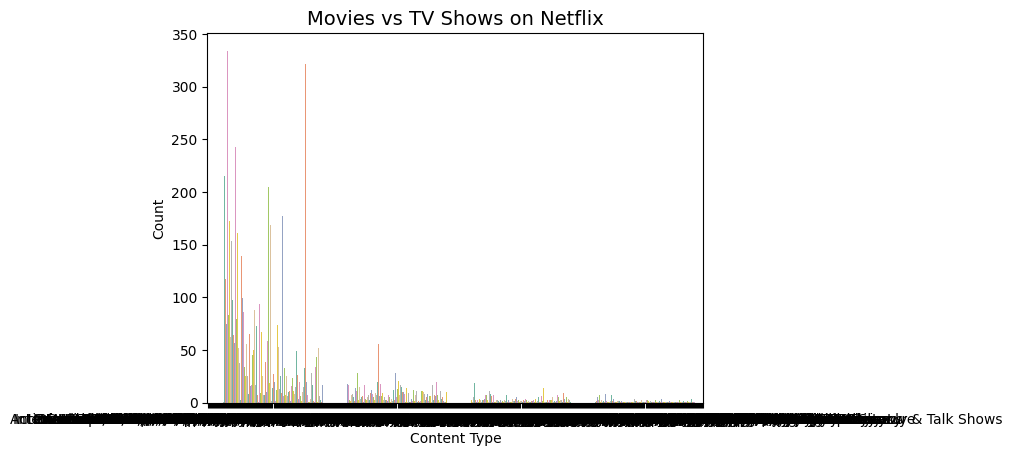

In [10]:
sns.countplot(x='Type', data=df, palette='Set2')
plt.title("Movies vs TV Shows on Netflix", fontsize=14)
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.show()

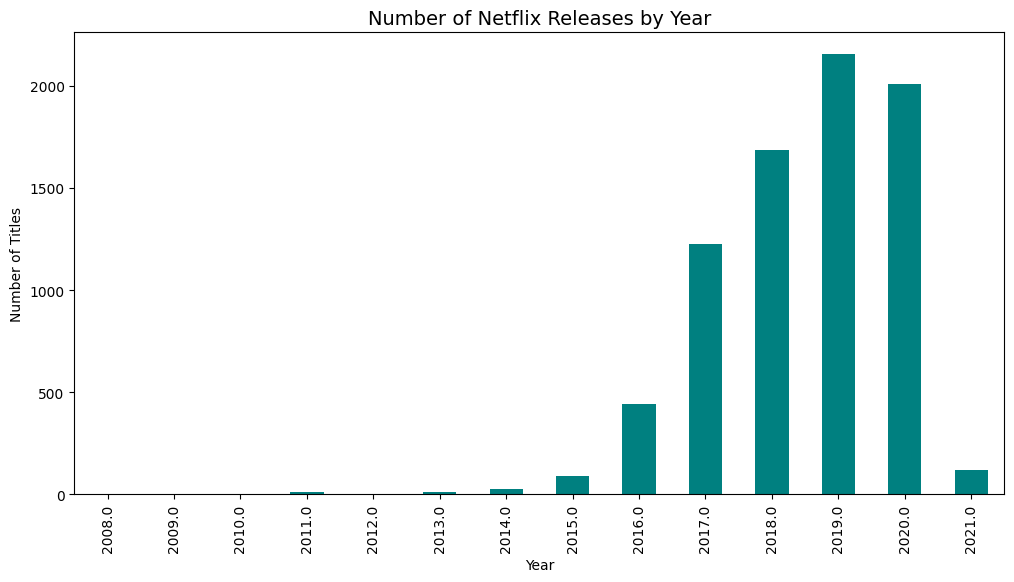

In [11]:
df['Year'].value_counts().sort_index().plot(kind='bar', figsize=(12,6), color='teal')
plt.title("Number of Netflix Releases by Year", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()

/tmp/ipython-input-187438703.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


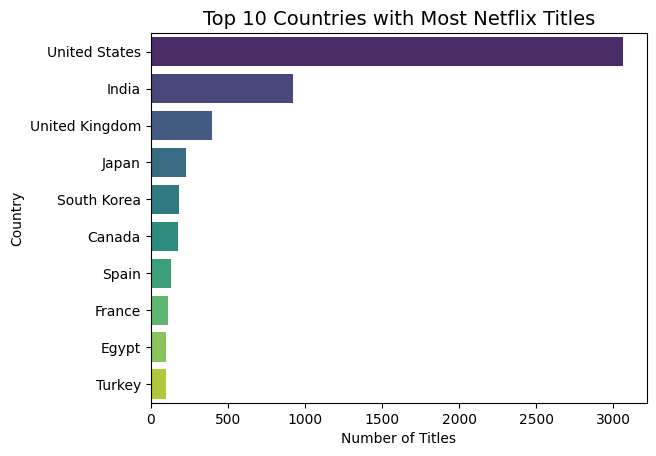

In [12]:
top_countries = df['Country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title("Top 10 Countries with Most Netflix Titles", fontsize=14)
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

/tmp/ipython-input-1798613137.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Rating', data=df, order=df['Rating'].value_counts().index, palette='mako')


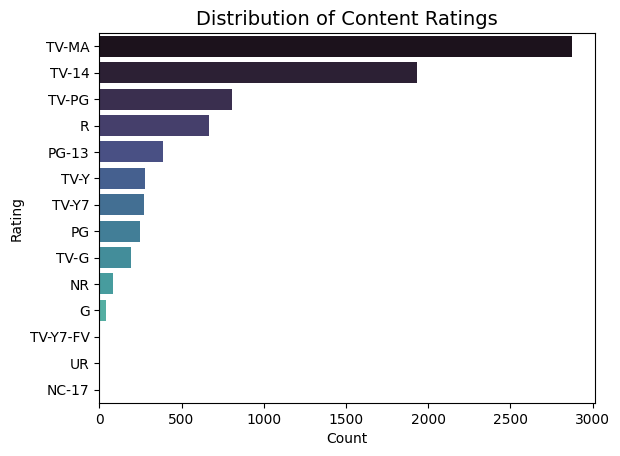

In [13]:
sns.countplot(y='Rating', data=df, order=df['Rating'].value_counts().index, palette='mako')
plt.title("Distribution of Content Ratings", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Rating")
plt.show()

/tmp/ipython-input-3348589458.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='cubehelix')


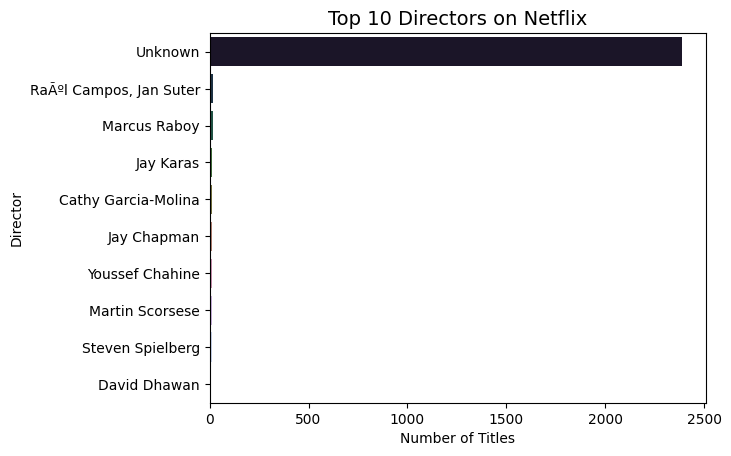

In [14]:
top_directors = df['Director'].value_counts().head(10)
sns.barplot(x=top_directors.values, y=top_directors.index, palette='cubehelix')
plt.title("Top 10 Directors on Netflix", fontsize=14)
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.show()

In [15]:
df.to_csv("Netflix_Cleaned_Final.csv", index=False)
print("✅ Cleaned dataset saved successfully!")

✅ Cleaned dataset saved successfully!
